In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import math
#matplotlib.use('TkAgg')


In [2]:
def load_data(fileName):
    data = pd.read_excel(fileName,index_col=0)
    data = data.dropna(axis=1)
    data['性别'] = data['性别'].map({'男':0,'女':1})
    # sns.pairplot(data)
    return data

In [3]:
fileName = './work/2021冬模式识别数据收集.xlsx'
data = load_data(fileName)

In [5]:
height=data['身高(cm)']
weight=data['体重(kg)']
r=data[['身高(cm)', '体重(kg)']].corr(method='pearson')

In [39]:
height.min()

158

In [40]:
height.max()

190

In [6]:
r

,身高(cm),体重(kg)
身高(cm),1.000000,0.658102
体重(kg),0.658102,1.000000


In [21]:
r.iloc[0][1]**2

0.43309788108146896

In [8]:
meanx=np.mean(height)
meanx

174.13725490196077

In [9]:
varx=np.var(height)*len(height)/(len(height)-1)
varx

62.400784313725495

In [10]:
sigmax=np.sqrt(varx)
sigmax

7.899416707183227

In [11]:
meany=np.mean(weight)
vary=np.var(weight)*len(weight)/(len(weight)-1)
sigmay=np.sqrt(vary)
pi=math.pi

In [45]:
x = np.arange(start=height.min(), stop=height.max(), step=0.1)
y = np.arange(start=weight.min(), stop=weight.max(), step=0.1)
X, Y = np.meshgrid(x, y)

In [62]:
z=1/(2*pi*sigmax*sigmay*np.sqrt(1-r.iloc[0][1]**2))*np.exp(((X-meanx)**2/varx+(Y-meany)**2/vary-2*r.iloc[0][1]*(X-meanx)*(Y-meany)/sigmax/sigmay)/(-2*(1-r.iloc[0][1])**2))

In [64]:
z=(z-z.min())/(z.max()-z.min())

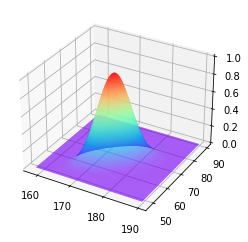

In [65]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,z,alpha=0.9, cstride=1, rstride = 1, cmap='rainbow')
ax.set_zlim(0,1)
plt.show()